<a href="https://colab.research.google.com/github/PengJuan-AI/TensorFlow_Study/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working on are from **Food 101**: https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** we start with a smaller dataset so we can experiment quickly and figure out what works (or better) before scaling up.


In [1]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-03 19:34:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.1MB/s    in 6.1s    

2023-08-03 19:34:51 (17.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning if any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many sample.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# work through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug  3 19:34 .
drwxr-xr-x 1 root root 4096 Aug  3 19:34 ..
drwxr-xr-x 4 root root 4096 Aug  3 19:34 test
drwxr-xr-x 4 root root 4096 Aug  3 19:34 train


In [7]:
# Another way to find out how many images are in afile
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first lets;s get the class names programmatically

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
import os
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from the subdirectories

class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
# Le's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in a image and plot it
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  # plt.axis('off')

  print(f"Image shape: {img.shape}") #show tha shape of image

  return img

['2397868.jpg']
Image shape: (384, 512, 3)


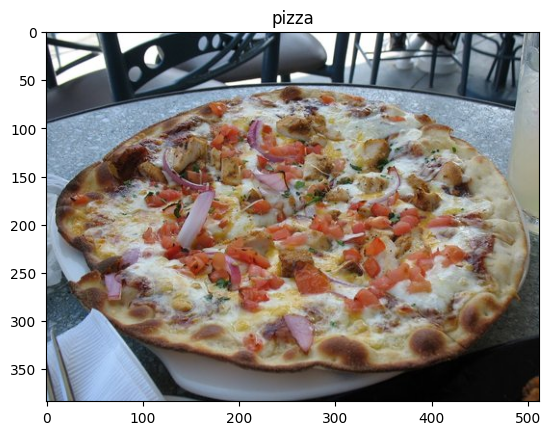

In [113]:
# View a random image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [11]:
img

array([[[169, 139, 101],
        [170, 140, 102],
        [170, 140, 102],
        ...,
        [ 43,  33,  23],
        [ 42,  32,  22],
        [ 42,  32,  22]],

       [[169, 139, 101],
        [169, 139, 101],
        [170, 140, 102],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 44,  34,  24]],

       [[168, 140, 101],
        [168, 140, 101],
        [168, 140, 101],
        ...,
        [ 47,  37,  27],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       ...,

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 92,  76,  61],
        [ 85,  71,  58],
        [ 81,  67,  54]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 81,  67,  54],
        [ 76,  62,  49],
        [ 72,  58,  45]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 75,  61,  48],
        [ 69,  57,  45],
        [ 66,  54,  42]]

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169, 139, 101],
        [170, 140, 102],
        [170, 140, 102],
        ...,
        [ 43,  33,  23],
        [ 42,  32,  22],
        [ 42,  32,  22]],

       [[169, 139, 101],
        [169, 139, 101],
        [170, 140, 102],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 44,  34,  24]],

       [[168, 140, 101],
        [168, 140, 101],
        [168, 140, 101],
        ...,
        [ 47,  37,  27],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       ...,

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 92,  76,  61],
        [ 85,  71,  58],
        [ 81,  67,  54]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 81,  67,  54],
        [ 76,  62,  49],
        [ 72,  58,  45]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 75,  61,  4

In [13]:
# View the image shape
img.shape # returns (width, height, color channels)

(512, 512, 3)

In [14]:
# Normalized pixel values
img/255.

array([[[0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.16862745, 0.12941176, 0.09019608],
        [0.16470588, 0.1254902 , 0.08627451],
        [0.16470588, 0.1254902 , 0.08627451]],

       [[0.6627451 , 0.54509804, 0.39607843],
        [0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.17647059, 0.1372549 , 0.09803922],
        [0.17254902, 0.13333333, 0.09411765],
        [0.17254902, 0.13333333, 0.09411765]],

       [[0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        ...,
        [0.18431373, 0.14509804, 0.10588235],
        [0.18039216, 0.14117647, 0.10196078],
        [0.18039216, 0.14117647, 0.10196078]],

       ...,

       [[0.25882353, 0.19607843, 0.13333333],
        [0.25490196, 0.19215686, 0.12941176],
        [0.25098039, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load images
* preprocess images
* build a CNN to find patterns in images
* compile CNN
* Fit the CNN to training data

In [15]:
from tensorflow.python.ops.math_ops import Imag
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all pixel values between 0 and 1, also called scaling/normalize)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
# It help us create train data and labels, already preprocess for us
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224), # reshape all the image into shape 224 x 224
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224,224),
                                               class_mode="binary", seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
# We can directly input train data
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 164ms/step - loss: 0.6349 - accuracy: 0.6387 - val_loss: 0.4750 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4984 - accuracy: 0.7713 - val_loss: 0.4059 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4435 - accuracy: 0.8027 - val_loss: 0.3875 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4075 - accuracy: 0.8233 - val_loss: 0.3348 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3798 - accuracy: 0.8400 - val_loss: 0.3543 - val_accuracy: 0.8260


In [16]:
# Epoch 1/5
# 47/47 [==============================] - 137s 3s/step - loss: 0.5548 - accuracy: 0.7000 - val_loss: 0.3696 - val_accuracy: 0.8380

We split images into 32 batches is because it can all fit into computer memory. Computers will calculate patterns in batches in order.

🔑**Note:** If the above cell is taking longer than ~10 seconds pr epoch, make sure you're using GPU. (you may have to rerun some cells above)

In [17]:
# batch size is 32 -> 47 batches
# batches give computer chance to memory patterns
len(train_data), 1500/32

(47, 46.875)

In [18]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [19]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 1.4951 - accuracy: 0.5107 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6944 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


3 layer (4,4,1).  
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

3 layers (100, 50 ,1).  
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.7318 - accuracy: 0.7773 - val_loss: 0.6258 - val_accuracy: 0.7180

5 layers (100, 100, 50, 50, 1).  
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4333 - accuracy: 0.8047 - val_loss: 0.4446 - val_accuracy: 0.7880


In [20]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 132ms/step - loss: 3.6894 - accuracy: 0.6307 - val_loss: 0.6394 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 1.2671 - accuracy: 0.6853 - val_loss: 0.7616 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5830 - accuracy: 0.7660 - val_loss: 0.5121 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5592 - accuracy: 0.7773 - val_loss: 0.5806 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6860 - accuracy: 0.7460 - val_loss: 1.0303 - val_accuracy: 0.6220


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


<Axes: >

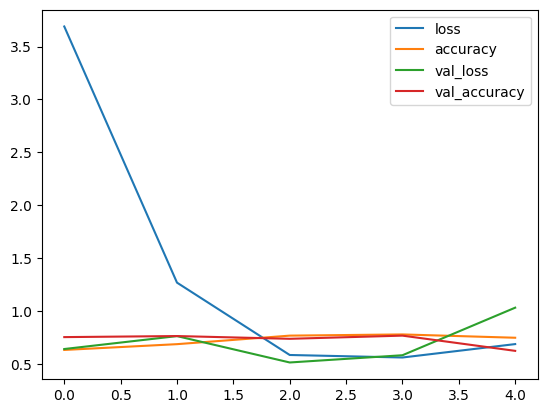

In [23]:
import pandas as pd
pd.DataFrame(history_3.history).plot()

## Binary Classification, Let's break it down

1. become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for the model, the main step here is to sacale/nomalize & tune our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameter and improve the model (try to beat the baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with data

Check random samples as many as possible.

['561972.jpg']
Image shape: (512, 512, 3)
['898843.jpg']
Image shape: (512, 512, 3)


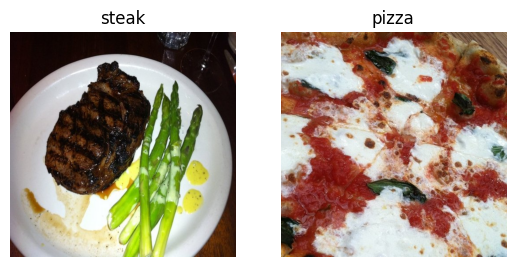

In [24]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [25]:
# Define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Our next step is to turn our data into **batches**. A model will look at a batch of data at one ti,e, rather than look at all bunch of images(data).

Reasons:
1. Thousands of images (or any form of data) might not fit the memory of our processor (GPU).
2. Trying to learn the patterns in thousands of images in one hit could result in the model not being able to learn very well.

Why 32? Possibly the most default used number in ML.

In [26]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
# Load in image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224), # target size of images (height, width)
                                               class_mode="binary", #type of data worked on
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Get a smaple of train data bacth
images, labels = train_data.next() # get the "next" batch of images /labels in train data
len(images), len(labels)

(32, 32)

In [29]:
# How many batches are there?
len(train_data)

47

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

The image data has been reshaped into size of 224 x 224.

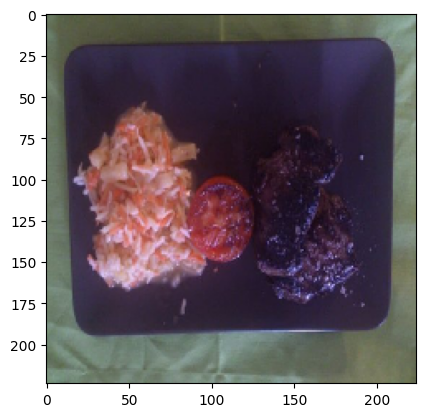

In [31]:
index=9
plt.imshow(images[1])

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existingresult that you setup when begining a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So to get started, you can start with something simple and see if it works on your data then introduce complexitt as required (look up the type of model that works best on the problem you work on) [Paper with code](https://paperswithcode.com/sota)

In [32]:
# Make a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
from keras.layers.serialization import activation
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows go across through an input (high=more complex)
           kernel_size=3, # the size of the sliding window going across an input
           strides = 1, # the size of step the silding window take
           padding='valid', # if "same", output shape is same as input shape, if "valid", the output shape get compressed
           activation='relu', input_shape=(224, 224, 3)), # this is the first layer, you should tell it the input shape
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [34]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Get a summary
model_4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the length of training and testing data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
history_4 = model_4.fit(train_data, # This is a combination of labels and data
                        epochs=5,
                        steps_per_epoch=len(train_data), # we want each epoch going through all batches
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 134ms/step - loss: 1.4558 - accuracy: 0.5587 - val_loss: 0.6499 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.5434 - accuracy: 0.7380 - val_loss: 0.4476 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4014 - accuracy: 0.8387 - val_loss: 0.3757 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3150 - accuracy: 0.8807 - val_loss: 0.4444 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.2107 - accuracy: 0.9287 - val_loss: 0.3151 - val_accuracy: 0.8700


In [38]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 84ms/step - loss: 0.3543 - accuracy: 0.8260


[0.3542996346950531, 0.8259999752044678]

### 5. Evalaute our model

It looks like baseline model is learning something, let's evaluate it.

<Axes: >

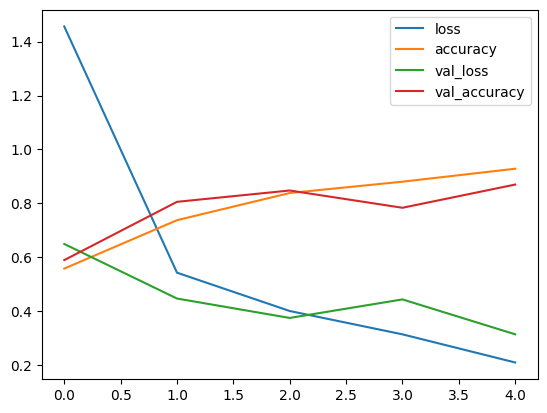

In [39]:
# let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [3]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

> **🔑Note:** When a model's **validation loss starts to increase**, it is likely the model is **overfitting** the training dataset.
Overfitting results in bad performance on predicting unseen data (or the generalization ability goes down)

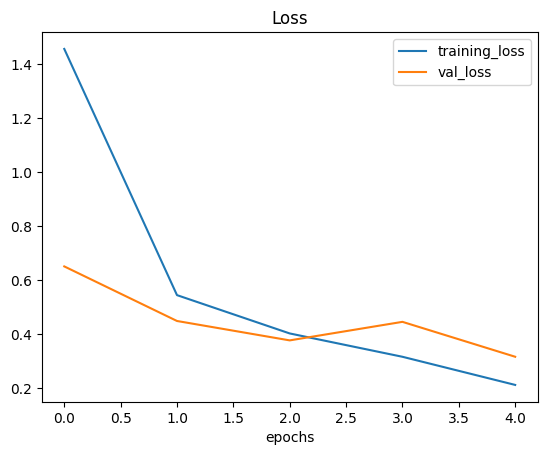

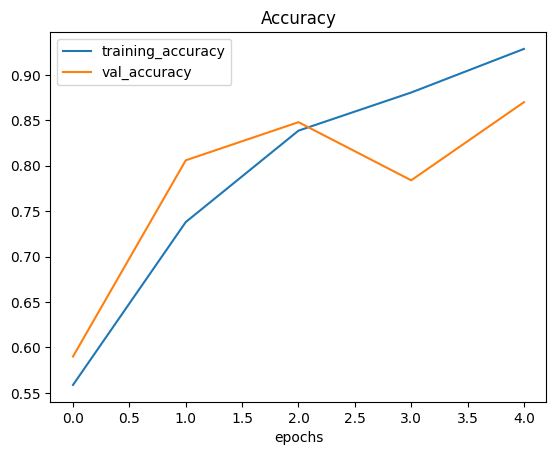

In [41]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**🔑Note:** Ideally the two loss curves will be very similar to each other (decreasing at a similar rates), when there are large differences your model may be **overftiing**.

### 6. Ajust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a basline
1. Beat the baseline by overfitting a larger model
2.Reduce overfitting

Wats to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce:
* Add data augamentation
* Add regularization layers (such as MaxPool2D)
* Add more data

> **Note:** Reducing overfitting is also known as **regulization**.

In [42]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


In [43]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
history_5 = model_5.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 122ms/step - loss: 0.6511 - accuracy: 0.5980 - val_loss: 0.5576 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4839 - accuracy: 0.7787 - val_loss: 0.3911 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4182 - accuracy: 0.8147 - val_loss: 0.3666 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3925 - accuracy: 0.8320 - val_loss: 0.3216 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3818 - accuracy: 0.8313 - val_loss: 0.3321 - val_accuracy: 0.8380


In [45]:
# Get a summary of model_5 (with max pooling)
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

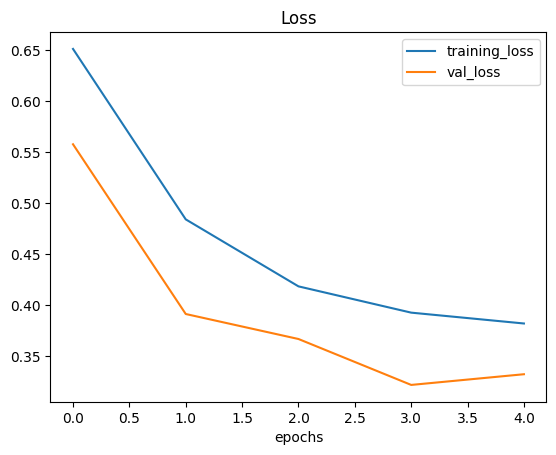

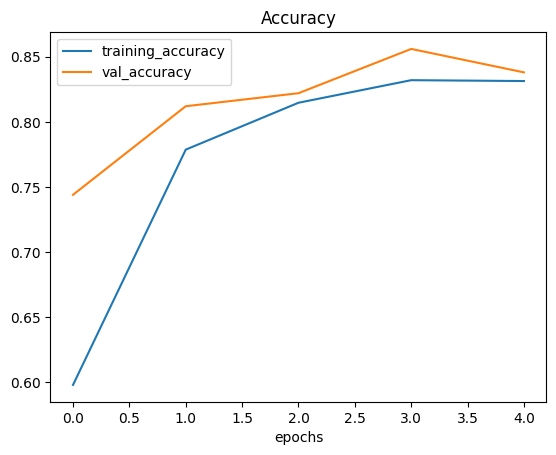

In [46]:
plot_loss_curves(history_5)

### Opening our bag of tricks and findingm data augmentation

In [47]:
from PIL import Image
# Create ImageDataGenerator training



# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Creare ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Questions:** What is data augmentation?

Data aygmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable patterns (ideally). Altering might mean adjusting the rotation of an image, flippng it, cropping it or something similar.

Or, increase the diversity of our training dataset without collecting more data.


In [48]:
# Write some code to visualize data augmentation

In [49]:
# import data from training directories
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purpose
# Create non-augmented train data batches
print("NOn-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224),
                                             batch_size=32, class_mode="binary")



Augmented training data
Found 1500 images belonging to 2 classes.
NOn-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentaition is usually only performed the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Because when we generate training data we set `shuffle=False`, so when loading data from directory, it will follow the sequential order. Then we can compare the augmented and non-augmented images.

In [50]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


In [51]:
len(images)

32

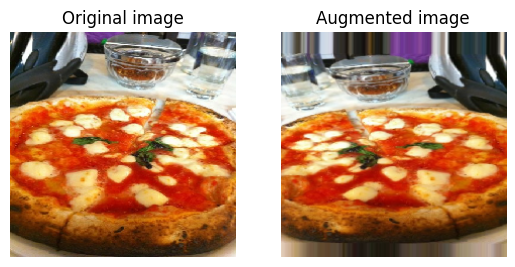

In [52]:
# Show the original image and augmented image
import random
random_number = random.randint(0,32)

plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented image looks like, let's build a model fitted on augmented data

In [53]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [54]:
model_6.compile(loss="binary_crossentropy",
optimizer=Adam(),
metrics=["accuracy"])

In [55]:
history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), # Fitting model_6 on augmented data
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 422ms/step - loss: 0.7239 - accuracy: 0.4787 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.7026 - accuracy: 0.5160 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6929 - accuracy: 0.5093 - val_loss: 0.6834 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 20s 425ms/step - loss: 0.6870 - accuracy: 0.5240 - val_loss: 0.6759 - val_accuracy: 0.5660
Epoch 5/5
47/47 [==============================] - 21s 442ms/step - loss: 0.6862 - accuracy: 0.6200 - val_loss: 0.6708 - val_accuracy: 0.6940


The training ETA for each epochs took a longer time.(🧐)

💡One of the reason is that it has to be transformed (preprocessed) as the model is learning the patterns.

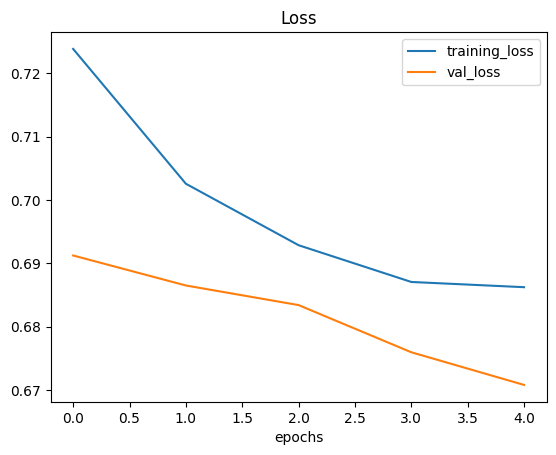

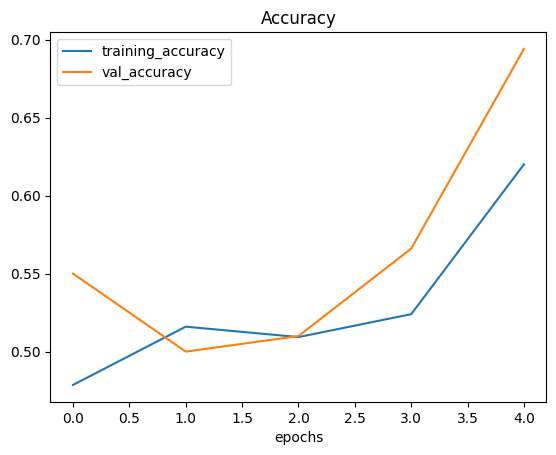

In [56]:
# Check model training curves
plot_loss_curves(history_6)

Low accuracy may be resulted from that we do not shuffle our data.

Let's shuffle augmented training data and train another model (the same as before) on it.

In [57]:
# Generate an augmented  train data shuffled.
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # For demonstration purpose

Found 1500 images belonging to 2 classes.


In [58]:
from keras.utils.sidecar_evaluator import optimizer
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 452ms/step - loss: 0.6560 - accuracy: 0.6100 - val_loss: 0.4697 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5267 - accuracy: 0.7420 - val_loss: 0.4837 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 21s 448ms/step - loss: 0.5059 - accuracy: 0.7720 - val_loss: 0.4747 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.5051 - accuracy: 0.7673 - val_loss: 0.5323 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4682 - accuracy: 0.7747 - val_loss: 0.3845 - val_accuracy: 0.8300


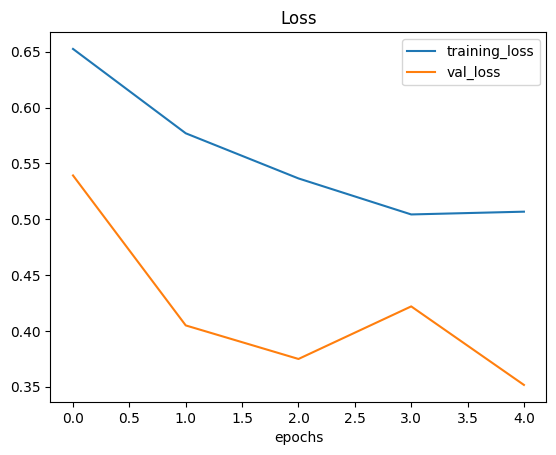

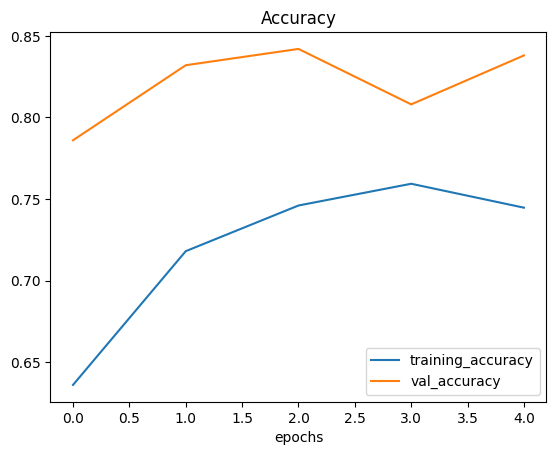

In [103]:
# Check model_7's learning curves
plot_loss_curves(history_7)

**🔑Note:** When shufflinng tarin data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array or images

### 7. Repeat until satisfied

Since we have already beaten our baseline, a few things we could try to continue improving our model
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each Conv layer (e.g. from 10 to 32 or even 54)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what other image model has learn and adjust it for our own use case.

### Practice

Recreate a model (same as `model_1`) and fit it on th augmented data

Results of `model_1`
```
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3798 - accuracy: 0.8400 - val_loss: 0.3543 - val_accuracy: 0.8260
```

In [59]:
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [60]:
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [61]:
history_8 = model_8.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 483ms/step - loss: 0.6323 - accuracy: 0.6453 - val_loss: 0.4249 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 29s 613ms/step - loss: 0.5289 - accuracy: 0.7280 - val_loss: 0.4178 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 30s 634ms/step - loss: 0.5162 - accuracy: 0.7527 - val_loss: 0.4549 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 27s 564ms/step - loss: 0.5025 - accuracy: 0.7687 - val_loss: 0.4068 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 26s 558ms/step - loss: 0.4537 - accuracy: 0.8013 - val_loss: 0.3299 - val_accuracy: 0.8660


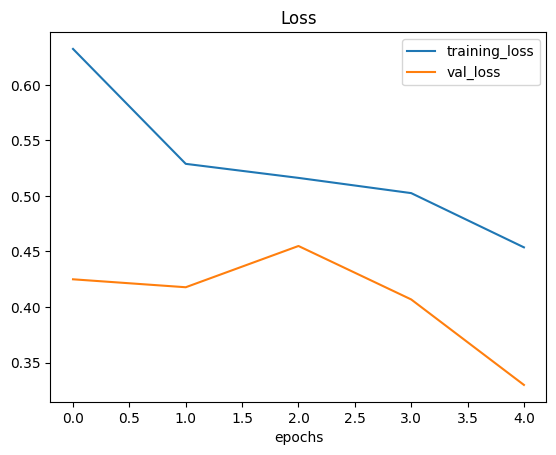

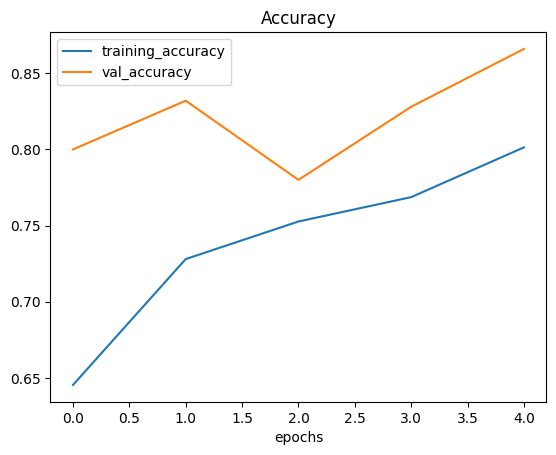

In [62]:
plot_loss_curves(history_8)

### Making a predcion on our model

--2023-08-03 19:56:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-08-03 19:56:46 (199 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



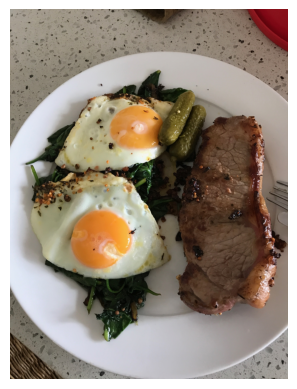

In [64]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

> **Note:** When you train a nrural network and you want to make a pediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

**Tips:** TensorFlow has various modules to load different kinds of files.

In [4]:
# Create a function to import an image and resize it to be able to used with our model (224,224,3)
def load_and_prep_image(filename, img_shape=224):
  """
  Read an image from filename, turn it into a tensor and reshape it into (img_shape, img_shape, color_channels).
  """

  # Read in to image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img


In [67]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [69]:
pred = model_7.predict(tf.expand_dims(steak, axis=0)) # and we get a prediction probability
pred

1/1 [==============================] - 0s 29ms/step


array([[0.9483911]], dtype=float32)

The modle currently ouputs a prediction probability, we could visualize the image as wll as the model's prediction

In [70]:
# We can index the prediction class by round up the prediction probability and
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [5]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image
  plt.imshow(img)
  plt.title(f"Predcition: {pred_class}")
  plt.axis=(False)

NameError: ignored

1/1 [==============================] - 0s 21ms/step


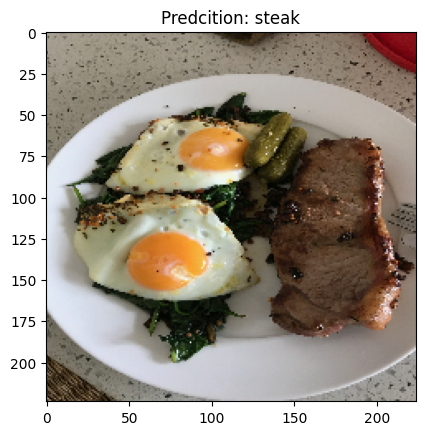

In [72]:
# Test our model on a cistom image
pred_and_plot(model_7, "03-steak.jpeg")

This time let's try pizza

--2023-08-03 20:46:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-08-03 20:46:43 (147 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 65ms/step


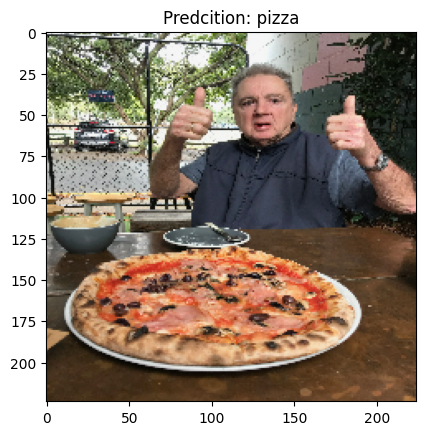

In [89]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

In [91]:
!wget https://raw.githubusercontent.com/PengJuan-AI/TensorFlow_Study/blob/main/custom_img/pizza3.jpeg

--2023-08-03 20:47:47--  https://raw.githubusercontent.com/PengJuan-AI/TensorFlow_Study/blob/main/custom_img/pizza3.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-08-03 20:47:47 ERROR 404: Not Found.



❓ How to download raw pictures from current version of github?

## Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

In [19]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-04 18:05:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.217.212.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   249MB/s    in 2.0s    

2023-08-04 18:05:45 (249 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

# walk through 10 classes of foof image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [4]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
# Le's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in a image and plot it
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  # plt.axis('off')

  print(f"Image shape: {img.shape}") #show tha shape of image

  return img

['2514432.jpg']
Image shape: (384, 512, 3)


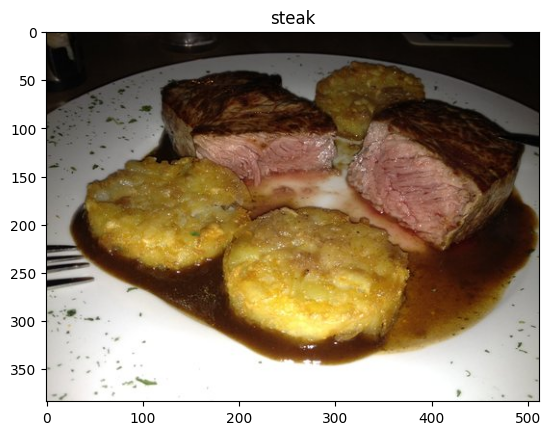

In [9]:
# Visualize, visualize, visualize
img = view_random_image(train_dir, random.choice(class_names))

### 2. Preprocess the data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
data = train_data.next()


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]')

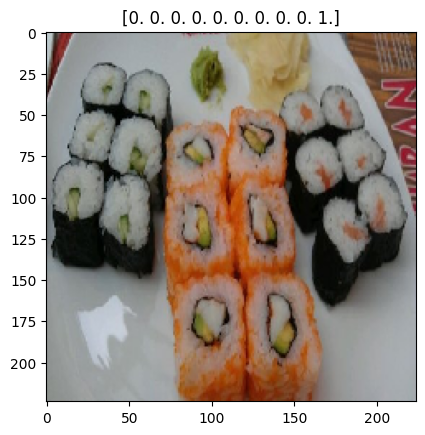

In [13]:
index = random.randint(0,32)
plt.imshow(data[0][index])
plt.title(data[1][index])

### Create a model (start with a baseline)

Let's just take the model architecture on CNN explainer website and use it for our problem.

In [14]:
# Make a model
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation


In [15]:
# create a CNN model
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 136ms/step - loss: 2.2118 - accuracy: 0.1832 - val_loss: 2.0405 - val_accuracy: 0.2788
Epoch 2/5
235/235 [==============================] - 49s 207ms/step - loss: 1.9383 - accuracy: 0.3191 - val_loss: 1.9078 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 35s 147ms/step - loss: 1.6763 - accuracy: 0.4315 - val_loss: 1.9001 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 40s 169ms/step - loss: 1.1625 - accuracy: 0.6187 - val_loss: 2.2307 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 53s 227ms/step - loss: 0.5186 - accuracy: 0.8345 - val_loss: 3.2202 - val_accuracy: 0.2952


In [16]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Evaluate the model

In [17]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 3.2202 - accuracy: 0.2952


[3.2201523780822754, 0.295199990272522]

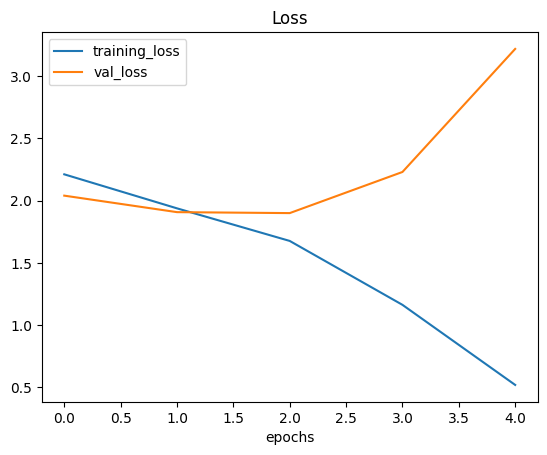

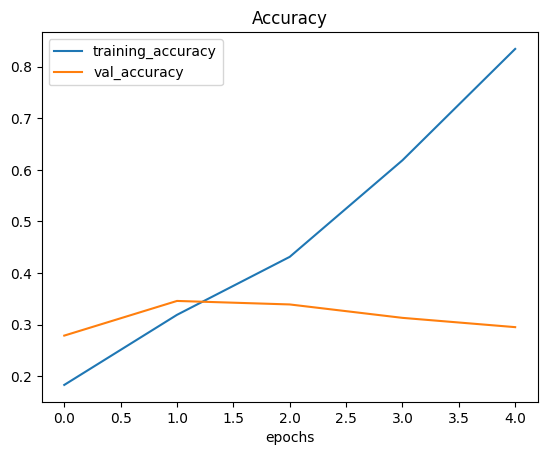

In [20]:
plot_loss_curves(history_8)

What do these loss curves tell us:

It seems our model is **overfitting** the training set, it is getting great result on the training data but fails to generalize well to unseen data and perform badly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Let's try and fix overfitting:

1. **Get more data** Give our model more opportunities to learn diverse patterns.
2. **Simplify the model** if our current model is overfitting the data, it may be too complicated of the model. One way to simplify is to reduce # layers or # hidden units in layers
3. **Use data augmentation** data augmentation manipulates the training data to add more diversity to it (without altering the original data)
4. **Use transfer learning** transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

**Goal:**
* Higher accuracy than baseline
* More similar loss curves

In [ ]:
# # Try a simplifies version of model
# # Try remove 2 convolutional layers
# model_9 = Sequential([
#     Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
#     MaxPool2D(),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(),
#     Flatten(),
#     Dense(10, activation="softmax")
# ])

# model_9.compile(loss='categorical_crossentropy',
#                 optimizer=Adam(),
#                 metrics=["accuracy"])

In [ ]:
# # Fit the model with 2 conv2D layers
# history_9 = model_9.fit(train_data, epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

In [ ]:
# Check out the loss curves
# plot_loss_curves(history_9)

In [ ]:
# model_9.summary()

In [ ]:
model_8.summary()

Looks like "simplifying model" does not improve much.

Let's try data augmentation.

### Trying to reduce overfitting with data augmentation

Ideally, we want the new model to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy


In [22]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.5, # how much do you want to rotate an image?
                                             zoom_range=0.5, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                            #  horizontal_flip=True # flip an image
                                             )

In [23]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
history_10 = model_10.fit(train_data_augmented, epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_10)

In [ ]:
from keras.api._v2.keras.models import clone_model
# Let's recreate another model but this time we'll fit it onthe augmented traindata
model_11 = tf.keras.models.clone_model(model_8) # the same architecture of basline but not clone any weights or bias

# Compile the cloned model
model_11.compile(loss="categorical_crossentropy",
                      optimizer=Adam(),
                      metrics=["accuracy"])

In [ ]:
history_11 = model_11.fit(train_data_augmented, epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_11)

That looks much better, the loss curves are much closer to each other than the baseline and they're heading in the right direction. If we were to train for longer, we might see a further imporvement.

### 7. Repeat until satisfied

We could continue trying to bring loss curves closer and trying to improve the validaton/test accuracy.

How?

By running lots of experiments:
- restructring our model's architecture
- adjust the learning rate
- try different methods of data augmentation (that means adjusting the hyperparamters in our ImageGenerator instance)
- training for longer
- try **transfer learning**

### Making a prediction with our trained model

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Reconfig pred_and_plot to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  # Add in logic for multi-class
  if len(pred[0])>1: #means it's a multi-class problem
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # plot the image
  plt.imshow(img)
  plt.title(f"Predcition: {pred_class}")
  plt.axis=(False)

In [ ]:
# Make a prediction
pred_and_plot(model=model_11, filename='03-hamburger.jpeg', class_names=class_names)

Looks like our model didnn't perform very well on our custom iamges because it only get around 37% accuracy on the test data. So it is expected to function poorly on unseen data.


### Save and load model

In [ ]:
# Save a model
model_11.save("trained_model_11")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("trained_model_11")
loaded_model_10.evaluate(test_data)

In [ ]:
# Compare loaded model to existing model
model_11.evaluate(test_data)

## Exercise

Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [24]:
# Build a new model
model_12 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#Compile
model_12.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Before we fit the model, we should create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch/10)
)

model_12.fit(train_data_augmented, epochs=10,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data),
             callbacks=[lr_scheduler])

Epoch 1/10
235/235 [==============================] - 121s 502ms/step - loss: 2.2480 - accuracy: 0.1537 - val_loss: 2.0672 - val_accuracy: 0.2424 - lr: 0.0010
Epoch 2/10
235/235 [==============================] - 109s 462ms/step - loss: 2.1376 - accuracy: 0.2151 - val_loss: 2.0221 - val_accuracy: 0.2660 - lr: 0.0013
Epoch 3/10
235/235 [==============================] - 104s 442ms/step - loss: 2.1082 - accuracy: 0.2327 - val_loss: 1.9776 - val_accuracy: 0.2788 - lr: 0.0016
Epoch 4/10
235/235 [==============================] - 105s 449ms/step - loss: 2.0945 - accuracy: 0.2437 - val_loss: 1.9542 - val_accuracy: 0.3152 - lr: 0.0020
Epoch 5/10
235/235 [==============================] - 105s 444ms/step - loss: 2.0761 - accuracy: 0.2597 - val_loss: 1.9395 - val_accuracy: 0.3256 - lr: 0.0025
Epoch 6/10
235/235 [==============================] - 104s 442ms/step - loss: 2.0806 - accuracy: 0.2540 - val_loss: 1.9251 - val_accuracy: 0.3288 - lr: 0.0032
Epoch 7/10
235/235 [==========================

<Axes: >

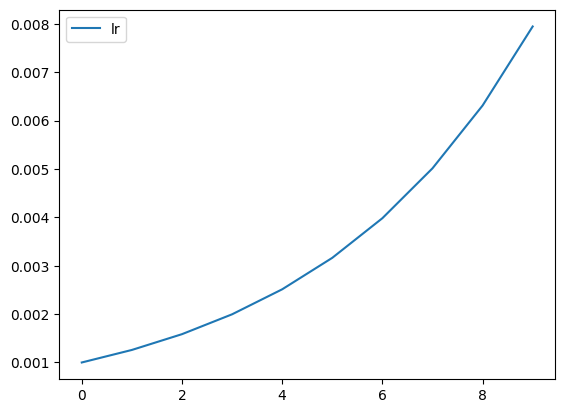

<Figure size 640x480 with 0 Axes>

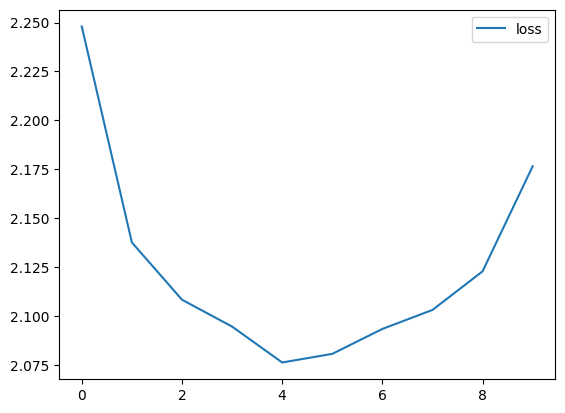

In [34]:
# plot_loss_curves(history_11)
history_12 = pd.DataFrame(model_12.history.history)
history_12[['lr']].plot()
plt.figure()
history_12[['loss']].plot()

It seems like 0.002 is the best learning rate.